# Import Necessary Libraries

import essential libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

The dataset is loaded from a CSV file named 'Books_Data_Clean.csv' into a pandas DataFrame for analysis.

In [2]:
df = pd.read_csv('/Books_Data_Clean.csv')

# Initial Data Exploration

Display the first few rows and summary statistics of the dataset to understand its structure and contents.

In [3]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


# Data Cleaning

Filter out records with publishing years before 1900, check for missing values, and drop rows with missing book names.

In [5]:
df = df[df['Publishing Year']>1900]

In [8]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,0
Author,0
language_code,47
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [7]:
df.dropna(subset = 'Book Name', inplace = True)

# Check for Duplicates and Unique Values

Identify the number of duplicate entries and count unique values in the dataset.

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


# Distribution of Publishing Year

Visualize the distribution of publishing years using a histogram.

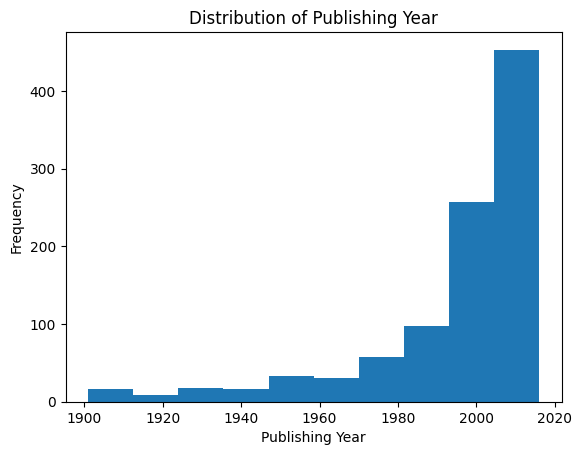

In [11]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()

# Genre Analysis

Create a bar plot to show the number of books in each genre.

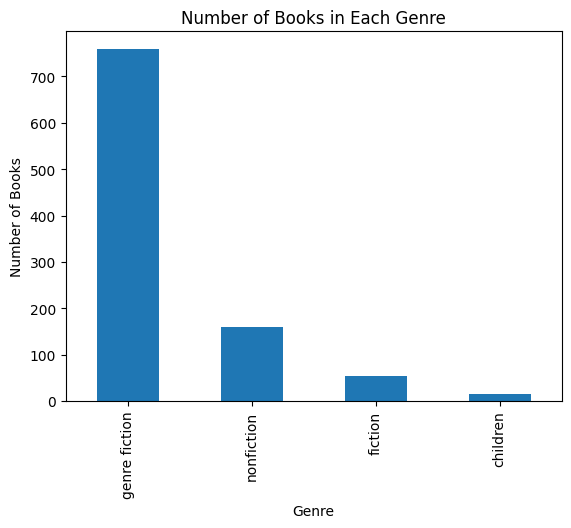

In [12]:
df["genre"].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in Each Genre")
plt.show()

# Average Ratings by Author

Calculate and display the average book ratings for each author, sorted in descending order.

In [14]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

,Book_average_rating
Author,
Bill Watterson,4.650000
"Bill Watterson, G.B. Trudeau",4.610000
J.R.R. Tolkien,4.590000
George R.R. Martin,4.560000
Sarah J. Maas,4.526000
...,...
Chetan Bhagat,3.273333
Audrey Niffenegger,3.230000
"Herman Koch, Sam Garrett",3.220000


# Box Plot of Ratings Count by Genre

Use a box plot to visualize the distribution of book ratings count across different genres.

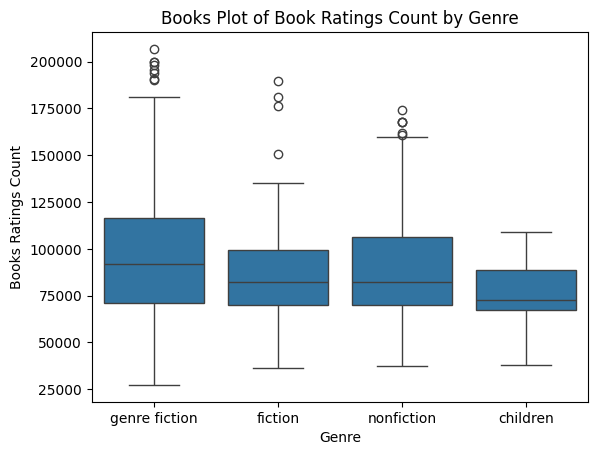

In [17]:
sns.boxplot(x='genre', y='Book_ratings_count', data = df)
plt.xlabel('Genre')
plt.ylabel('Books Ratings Count')
plt.title('Books Plot of Book Ratings Count by Genre')
plt.show()

# Relationship Between Sale Price and Units Sold

Scatter plot to analyze the relationship between sale price and units sold.

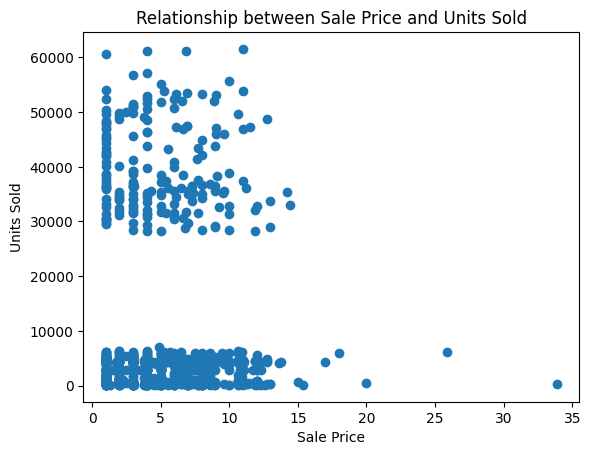

In [18]:
plt.scatter(df['sale price'], df['units sold'])
plt.xlabel('Sale Price')
plt.ylabel('Units Sold')
plt.title('Relationship between Sale Price and Units Sold')
plt.show()

# Language Distribution

Create a pie chart to visualize the distribution of languages in the dataset.

In [23]:
language_counts = df['language_code'].value_counts()

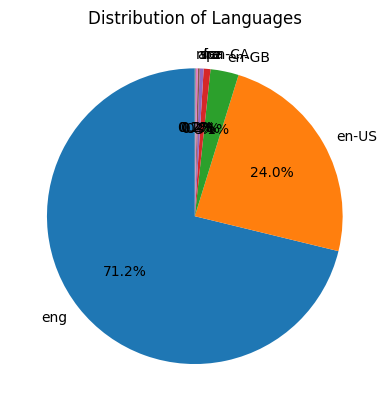

In [26]:
plt.pie(language_counts, labels=language_counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Languages')
plt.show()

# Publisher Revenue Analysis

Calculate total revenue generated by each publisher and sort the results.

In [29]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


# Author Rating Analysis

Analyze the average book ratings count and variance based on author ratings.

In [31]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False).max()

101400.27256944444

In [32]:
df.groupby("language_code").size().sort_values(ascending=False)

,0
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
ara,2
spa,2
nl,1


In [34]:
df.groupby("Author_Rating")["Book_average_rating"].var()

,Book_average_rating
Author_Rating,
Excellent,0.009964
Famous,0.048529
Intermediate,0.034988
Novice,0.009940


# Relationship Between Ratings and Ratings Count

Scatter plot to explore the relationship between book average rating and ratings count.

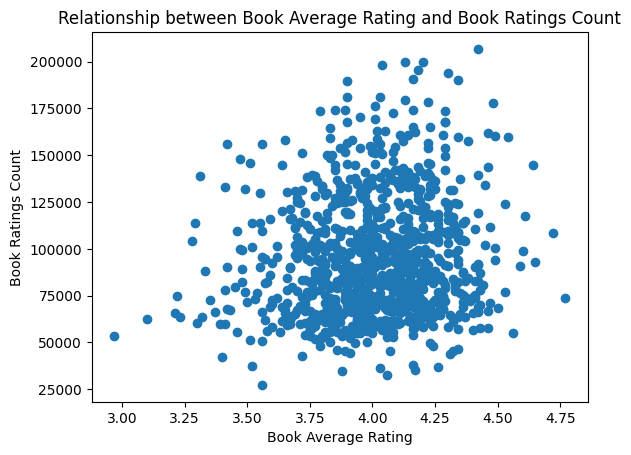

In [35]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.title("Relationship between Book Average Rating and Book Ratings Count")
plt.show()

# Total Gross Sales by Author

Calculate and visualize the total gross sales for each author, highlighting the top 20 authors.

In [36]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()

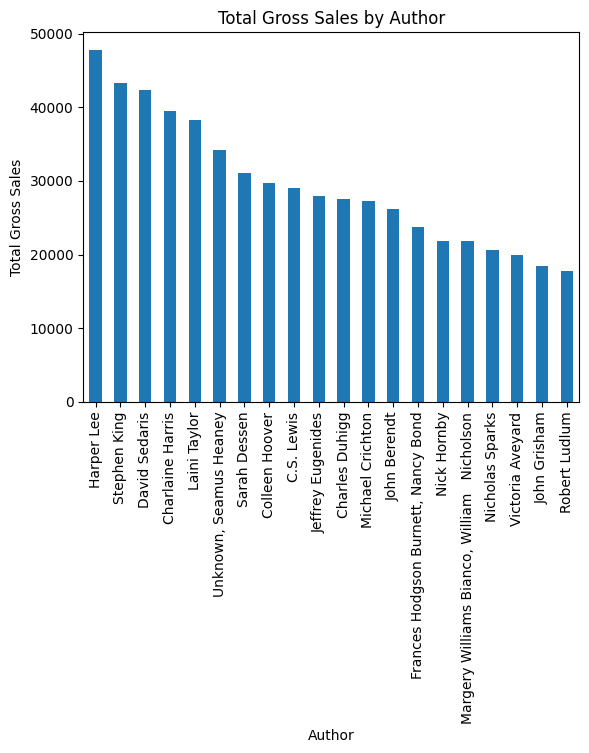

In [39]:
total_gross_sales_by_author.sort_values(ascending=False).head(20).plot(kind="bar")
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales by Author")
plt.show()

# Box Plot of Units Sold by Author Rating

Visualize the distribution of units sold for each author rating using a box plot.

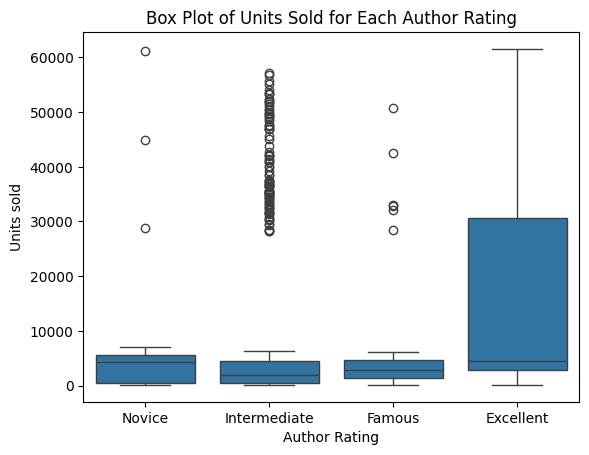

In [41]:
sns.boxplot(x="Author_Rating", y="units sold", data = df)
plt.xlabel("Author Rating")
plt.ylabel("Units sold")
plt.title("Box Plot of Units Sold for Each Author Rating")
plt.show()

# Total Units Sold Over the Years

Line plot to show the trend of total units sold over the years.

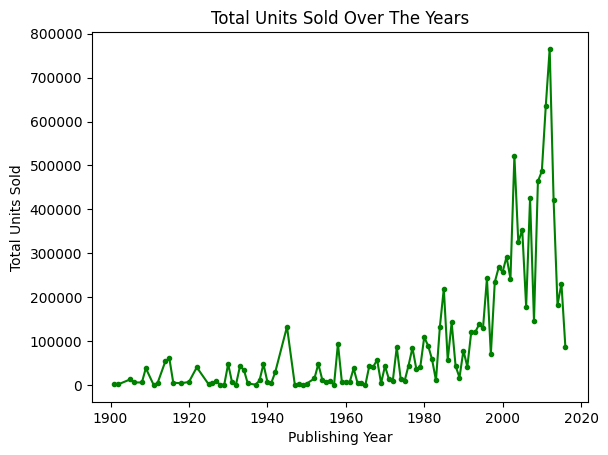

In [46]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind="line", color='green' ,marker='o', markersize=3)
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold Over The Years")
plt.show()